# Datenanalyse in interaktivem Umfeld

In diesem Notebook erfolgt eine Datenanalyse des in der Ausarbeitung vorgestellten Datensatzes. <br> Dabei werden interaktiv die Ergebnisse hergeleitet, die in der Ausarbeitung niedergeschrieben worden sind. 

Um den Fokus auf die eigentliche Datenanalyse zu legen, wurden einige Prozesse modularisiert. <br>
    Dazu wurde das __`darstellungsmodul2`__, ein in Python geschriebenes Skript, erstellt. Das Darstellungsmodul findet sich als <br> Quellcode ebenfalls auf Github und umfasst folgende Funktionen:
* `heatmap`
* `Kuchendiagram`
* `Balkendiagram`
* `descr_stat`
* `preprocessing`
* `dictionary`

Einen kurzen Überblick, um mögliche Unklarheiten im Code dennoch zu vermeiden, <br> erfolgt mittels der folgenden kurzen Tabelle:

|Funktion|Nutzen
| :--- | :------------
| `heatmap` | Erstellt eine Korrelationsmatrix eines <br> gegebenen Datensatzes. 
| `Kuchendiagram` | Erstellt ein spezielles Kuchendiagramm.
| `Balkendiagram` |  Erstellt ein spezielles Balkendiagramm.
| `descr_stat` | Gibt einen Überblick über einen gegebenen <br> Datensatz in Form von deskriptiver Statistik. 
| `preprocessing` | Bereitet Werte für die Funktion *Balkendiagram* <br> auf. 
| `dictionary` | Erstellt ein Lexikon indem zwei Listen <br> zusammengefügt werden.

In [1]:
# Module einlesen
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
import joblib
#import pandas_profiling
import darstellungsmodul2 as drst

In [2]:
# Daten einlesen
df = pd.read_csv(
    os.path.join('Data', 'Fragebogen6e.csv'),
    sep=';')
df_ab1 = pd.read_csv(
    os.path.join('Data', 'Fragebogen6e Teil 1.csv'),
    sep=';')
df_ab2 = pd.read_csv(
    os.path.join('Data', 'Fragebogen6e Teil 2.csv'),
    sep=';')
df_ab3 = pd.read_csv(
    os.path.join('Data', 'Fragebogen6e Teil 3.csv'),
    sep=';')
df_ab4 = pd.read_csv(
    os.path.join('Data', 'Fragebogen6e Teil 4.csv'),
    sep=';')

Die Daten aus `df` sind mit `df_ab1`, `df_ab2`, `df_ab3`, `df_ab4` in verschiedene Teile aufgeteilt worden. Dies hat inhaltliche Gründe.

|Abschnitt|Code |Thema
| :--- | :--:| :------------
| 1 |`df_ab1` | Schülerorientierung 
| 2 |`df_ab2` | Unterrichtsgestaltung
| 3 |`df_ab3` | Regeleinhaltung
| 4 |`df_ab4` | Unterrichtsstörungen 

<div class="alert alert-block alert-warning">
    <b>Achtung:</b>  Das bedeutet an dieser Stelle jedoch nicht, dass der Datensatz <b>df</b> keine Relevanz mehr hat oder nicht mehr existiert. <br> Es handelt sich hierbei stets um eine inhaltliche Aufteilung für eine spezifischere Datenanalyse. 
</div>

In [3]:
# Überblick
profile = pandas_profiling.ProfileReport(df)
profile.to_widgets()

In [4]:
# Datensatz als Array
df_list = [df, df_ab1, df_ab2, df_ab3, df_ab4]

# Deskriptive Statistik
df.describe()

,Laune,freundlich,locker,ehrlich,Klsgem,verstehenS,loben,verstehenI,helfen,beschäftigen,...,Verweis,Vortrag,wütend,schreien,Sitznachbar,zuhören,träumen,beleidigen,respektlos,Geschlecht
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,...,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,4.772727,4.818182,4.545455,4.772727,3.727273,4.500000,4.500000,4.818182,4.863636,4.227273,...,1.818182,1.863636,1.636364,1.272727,3.318182,3.272727,3.181818,2.136364,1.545455,1.318182
std,0.428932,0.394771,0.509647,0.428932,0.631085,0.511766,0.740013,0.394771,0.351250,0.611930,...,0.906924,1.082126,0.657952,0.550482,0.779888,0.702500,0.906924,1.206942,0.738549,0.476731
min,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000
25%,5.000000,5.000000,4.000000,5.000000,3.000000,4.000000,4.000000,5.000000,5.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000
50%,5.000000,5.000000,5.000000,5.000000,4.000000,4.500000,5.000000,5.000000,5.000000,4.000000,...,2.000000,2.000000,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,1.000000,1.000000
75%,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,2.000000,2.000000,2.000000,1.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,5.000000,3.000000,3.000000,5.000000,4.000000,5.000000,5.000000,3.000000,2.000000


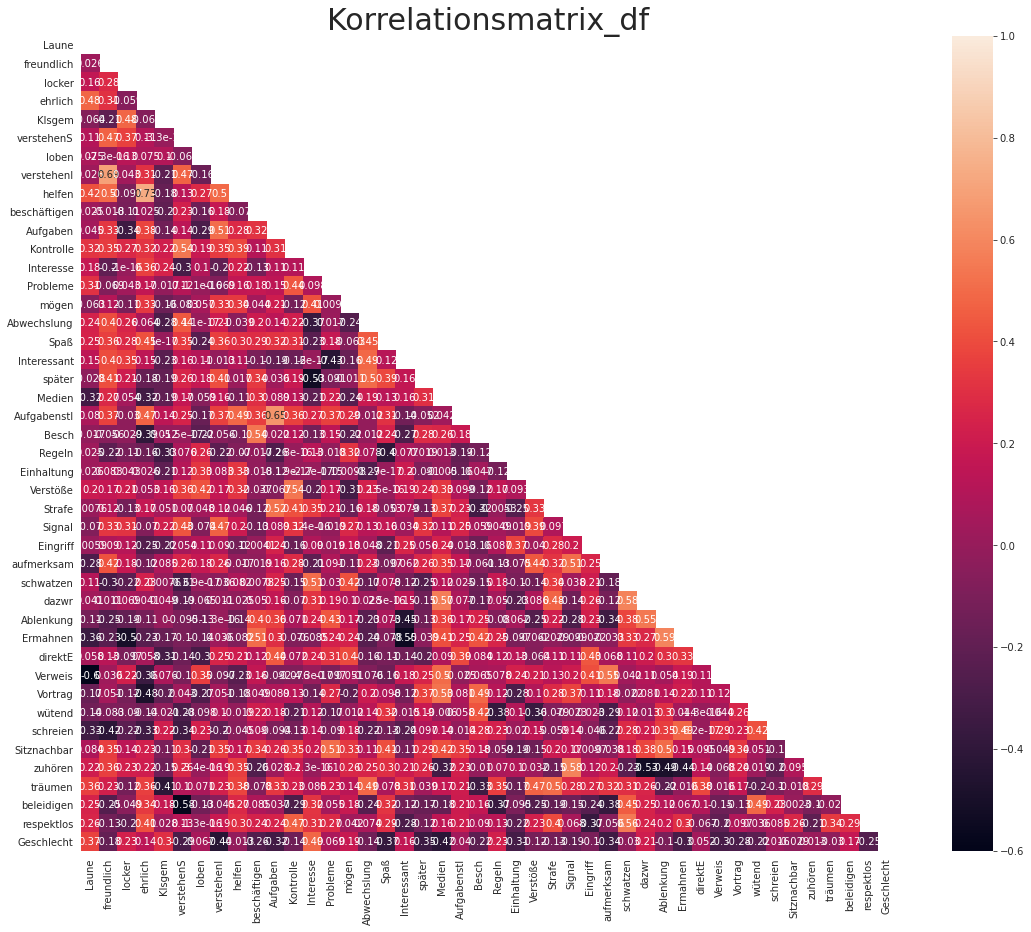

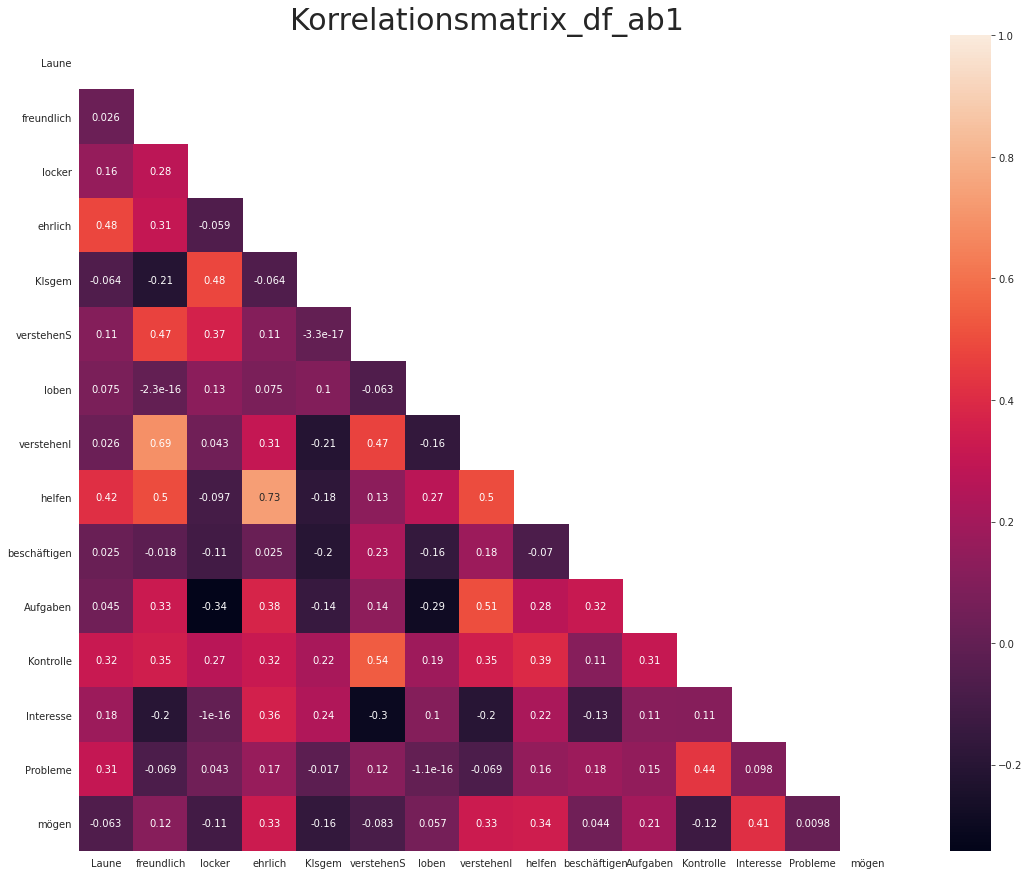

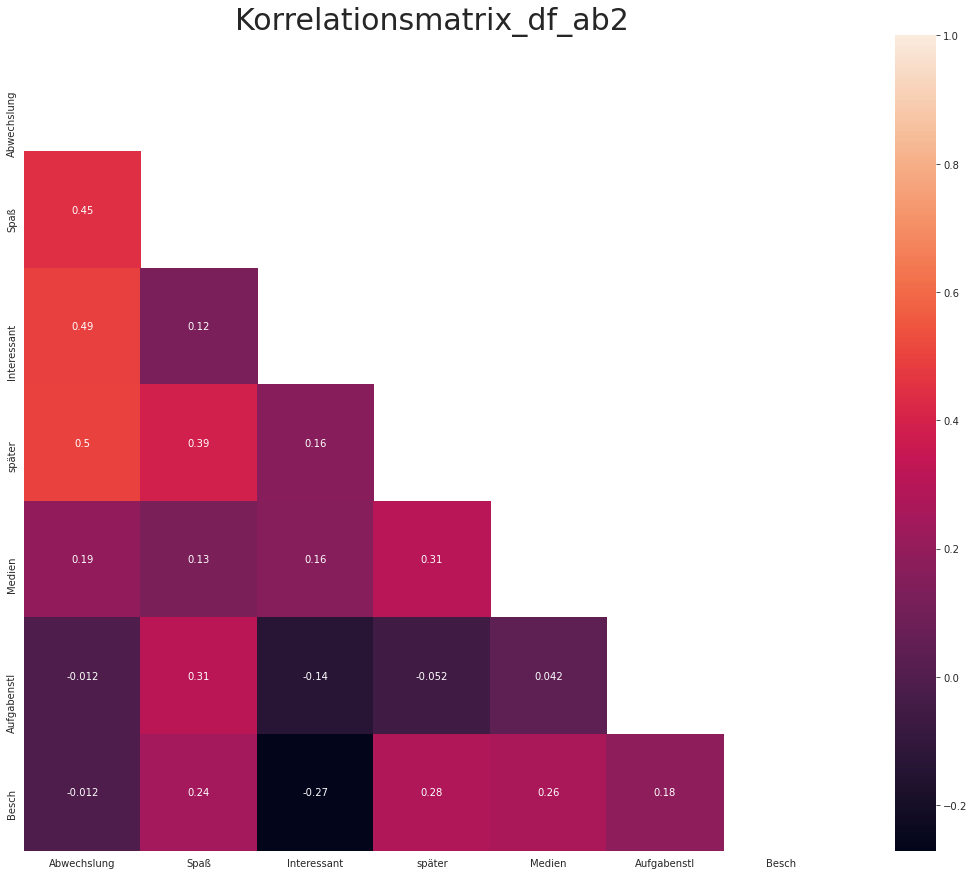

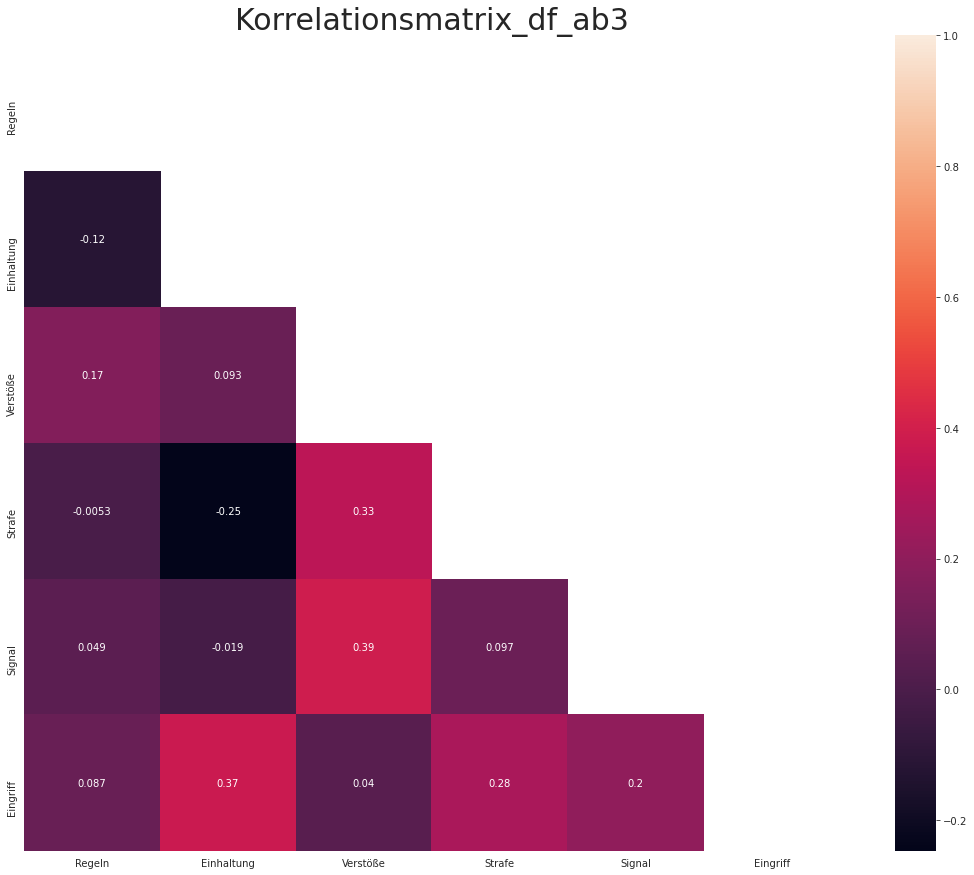

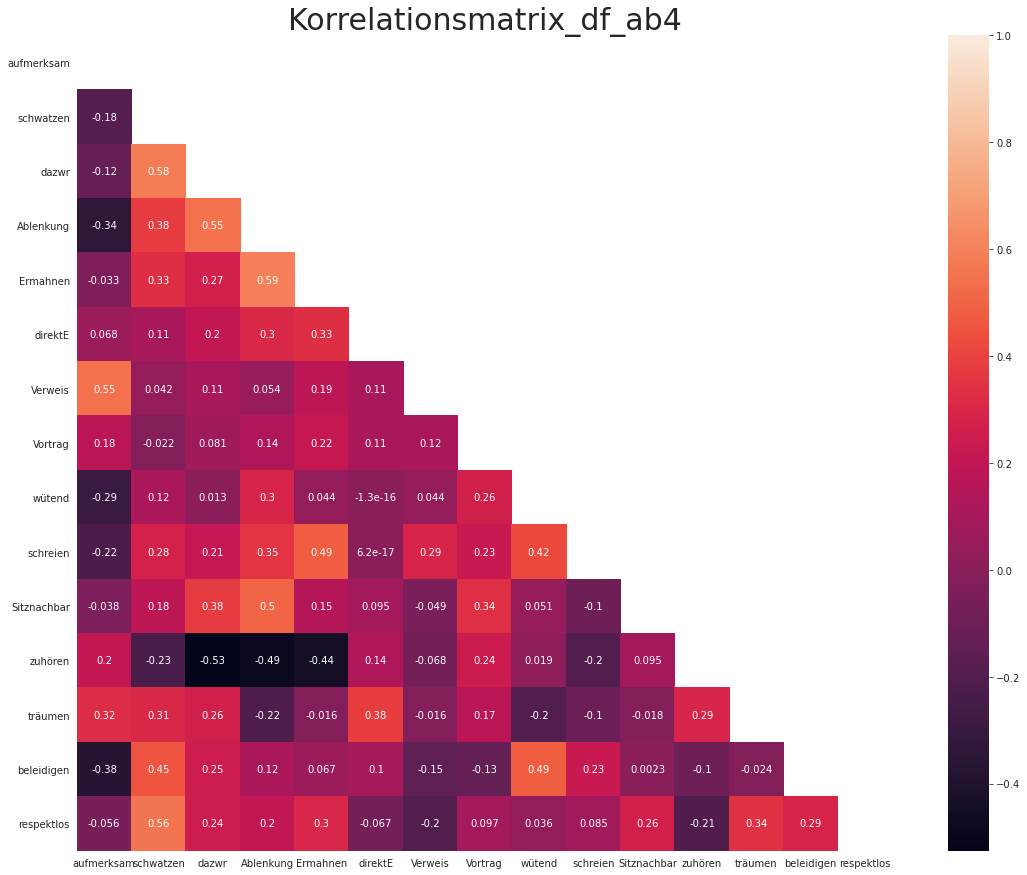

In [5]:
# Funktionsaufruf aus erstelltem Modul (zwecks Modularisierung)
# Größe
size = (20, 15)
dataframe_names = ['df', 'df_ab1', 'df_ab2', 'df_ab3', 'df_ab4']
drst.heatmap(df_list, size, dataframe_names)

<div class="alert alert-block alert-info">
<b>Info:</b> Hier wurde sich aus dem Darstellungsmodul bedient und die Funktion <b>heatmap</b> benutzt.</div>

In [4]:
# Deskriptive Statistik für alle Datensätze
drst.descr_stat(df_list)


 Deskriptive Statistik für Datensatz 1


[           Laune  freundlich     locker    ehrlich     Klsgem  verstehenS  \
count  22.000000   22.000000  22.000000  22.000000  22.000000   22.000000   
mean    4.772727    4.818182   4.545455   4.772727   3.727273    4.500000   
std     0.428932    0.394771   0.509647   0.428932   0.631085    0.511766   
min     4.000000    4.000000   4.000000   4.000000   3.000000    4.000000   
25%     5.000000    5.000000   4.000000   5.000000   3.000000    4.000000   
50%     5.000000    5.000000   5.000000   5.000000   4.000000    4.500000   
75%     5.000000    5.000000   5.000000   5.000000   4.000000    5.000000   
max     5.000000    5.000000   5.000000   5.000000   5.000000    5.000000   

           loben  verstehenI     helfen  beschäftigen  ...    Verweis  \
count  22.000000   22.000000  22.000000     22.000000  ...  22.000000   
mean    4.500000    4.818182   4.863636      4.227273  ...   1.818182   
std     0.740013    0.394771   0.351250     

<div class="alert alert-block alert-info">
<b>Info:</b> Hier wurde sich aus dem Darstellungsmodul bedient und die Funktion <b>descr_stat</b> benutzt.</div>

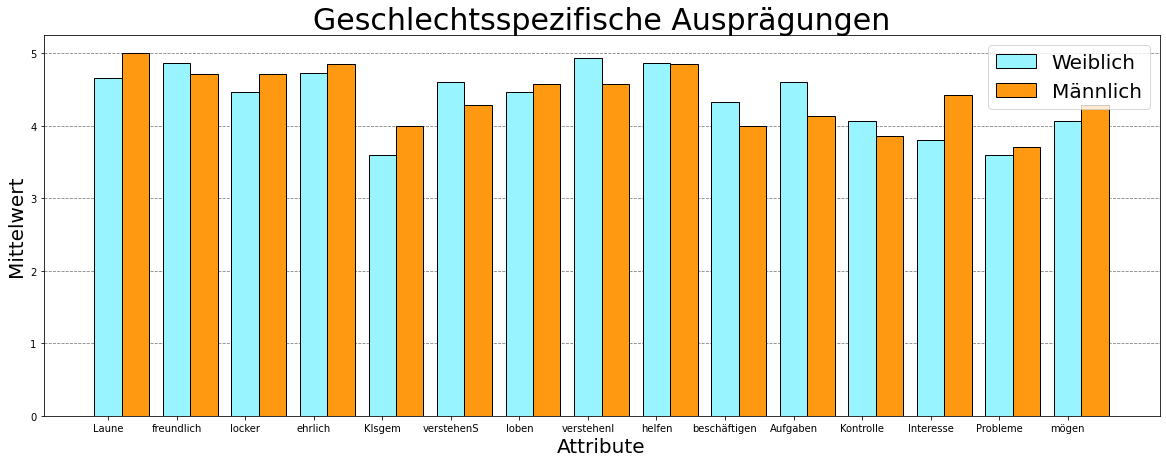

Werte Männer
{'Laune': 5.0, 'freundlich': 4.714285714285714, 'locker': 4.714285714285714, 'ehrlich': 4.857142857142857, 'Klsgem': 4.0, 'verstehenS': 4.285714285714286, 'loben': 4.571428571428571, 'verstehenI': 4.571428571428571, 'helfen': 4.857142857142857, 'beschäftigen': 4.0, 'Aufgaben': 4.142857142857143, 'Kontrolle': 3.857142857142857, 'Interesse': 4.428571428571429, 'Probleme': 3.7142857142857144, 'mögen': 4.285714285714286}



Werte Frauen
{'Laune': 4.666666666666667, 'freundlich': 4.866666666666666, 'locker': 4.466666666666667, 'ehrlich': 4.733333333333333, 'Klsgem': 3.6, 'verstehenS': 4.6, 'loben': 4.466666666666667, 'verstehenI': 4.933333333333334, 'helfen': 4.866666666666666, 'beschäftigen': 4.333333333333333, 'Aufgaben': 4.6, 'Kontrolle': 4.066666666666666, 'Interesse': 3.8, 'Probleme': 3.6, 'mögen': 4.066666666666666}





In [5]:
# Geschlechterspezifische Unterschiede für Abschnitt 1
means = df.groupby('Geschlecht').mean()
Spalten = list(df.columns[:15])
male_1d = [x for y in means.iloc[1:, :15].values for x in y]
female_1d = [x for y in means.iloc[:1, :15].values for x in y]

# Funktionsaufruf aus modularisiertem Skript
drst.Balkendiagramm('#FF9912', '#98F5FF', Spalten,
                    Spalten, df, (20, 7), 15, female_1d, male_1d, 'Geschlechtsspezifische Ausprägungen',
                    'Attribute', 'Mittelwert', ["Weiblich", "Männlich"], 'sex_differences.svg')

drst.dictionary(Spalten, male_1d, 'Werte Männer')

drst.dictionary(Spalten, female_1d, 'Werte Frauen')

<div class="alert alert-block alert-info">
<b>Info:</b> Hier wurde sich aus dem Darstellungsmodul bedient und die Funktionen <b>Balkendiagramm</b> und <b>Dictionary</b> benutzt.</div>

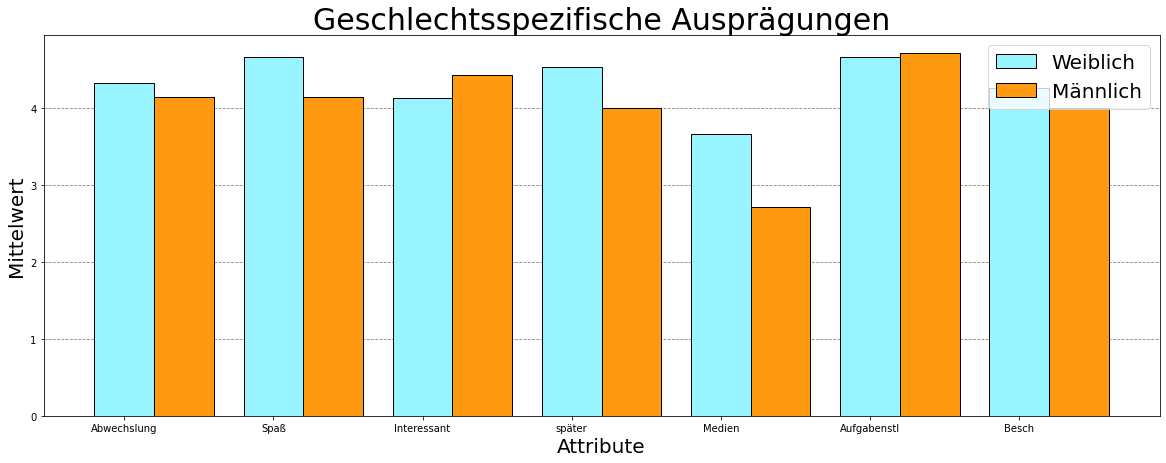

Werte Männer
{'Abwechslung': 4.142857142857143, 'Spaß': 4.142857142857143, 'Interessant': 4.428571428571429, 'später': 4.0, 'Medien': 2.7142857142857144, 'Aufgabenstl': 4.714285714285714, 'Besch': 4.0}



Werte Frauen
{'Abwechslung': 4.333333333333333, 'Spaß': 4.666666666666667, 'Interessant': 4.133333333333334, 'später': 4.533333333333333, 'Medien': 3.6666666666666665, 'Aufgabenstl': 4.666666666666667, 'Besch': 4.266666666666667}





In [6]:
# Geschlechterspezifische Unterschiede für Abschnitt 2
means = df.groupby('Geschlecht').mean()
Spalten = list(df.columns[15:22])
male_1d = [x for y in means.iloc[1:, 15:22].values for x in y]
female_1d = [x for y in means.iloc[:1, 15:22].values for x in y]

# Funktionsaufruf aus modularisiertem Skript
drst.Balkendiagramm('#FF9912', '#98F5FF', Spalten,
                    Spalten, df, (20, 7), 7, female_1d, male_1d, 'Geschlechtsspezifische Ausprägungen',
                    'Attribute', 'Mittelwert', ["Weiblich", "Männlich"], 'sex_differences2.svg')

drst.dictionary(Spalten, male_1d, 'Werte Männer')

drst.dictionary(Spalten, female_1d, 'Werte Frauen')

<div class="alert alert-block alert-info">
<b>Info:</b> Hier wurde sich aus dem Darstellungsmodul bedient und die Funktionen <b>Balkendiagramm</b> und <b>Dictionary</b> benutzt.</div>

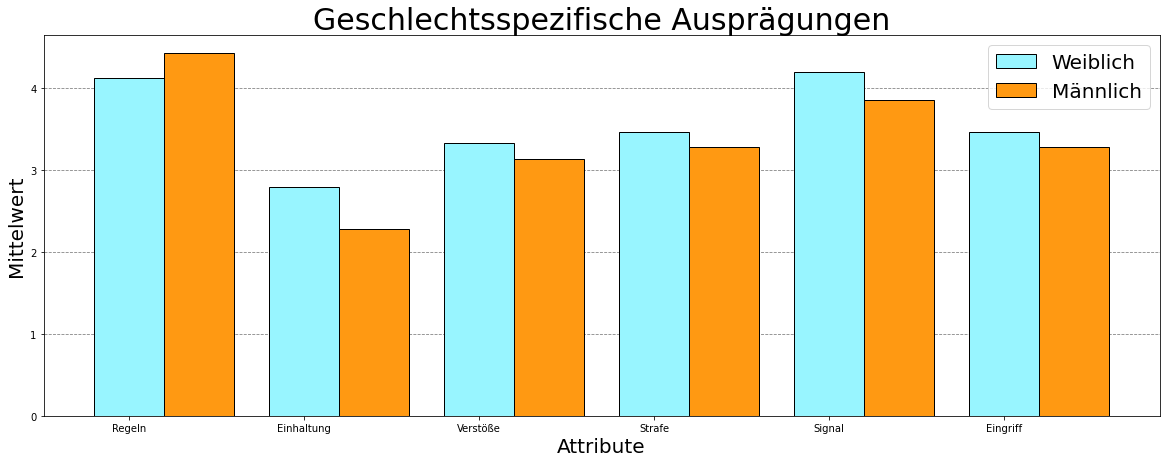

Werte Männer
{'Regeln': 4.428571428571429, 'Einhaltung': 2.2857142857142856, 'Verstöße': 3.142857142857143, 'Strafe': 3.2857142857142856, 'Signal': 3.857142857142857, 'Eingriff': 3.2857142857142856}



Werte Frauen
{'Regeln': 4.133333333333334, 'Einhaltung': 2.8, 'Verstöße': 3.3333333333333335, 'Strafe': 3.466666666666667, 'Signal': 4.2, 'Eingriff': 3.466666666666667}





In [7]:
# Geschlechterspezifische Unterschiede für Abschnitt 3
means = df.groupby('Geschlecht').mean()
Spalten = list(df.columns[22:28])
male_1d = [x for y in means.iloc[1:, 22:28].values for x in y]
female_1d = [x for y in means.iloc[:1, 22:28].values for x in y]


# Funktionsaufruf aus modularisiertem Skript
drst.Balkendiagramm('#FF9912', '#98F5FF', Spalten,
                    Spalten, df, (20, 7), 6, female_1d, male_1d, 'Geschlechtsspezifische Ausprägungen',
                    'Attribute', 'Mittelwert', ["Weiblich", "Männlich"], 'sex_differences3.svg')

drst.dictionary(Spalten, male_1d, 'Werte Männer')

drst.dictionary(Spalten, female_1d, 'Werte Frauen')

<div class="alert alert-block alert-info">
<b>Info:</b> Hier wurde sich aus dem Darstellungsmodul bedient und die Funktionen <b>Balkendiagramm</b> und <b>Dictionary</b> benutzt.</div>

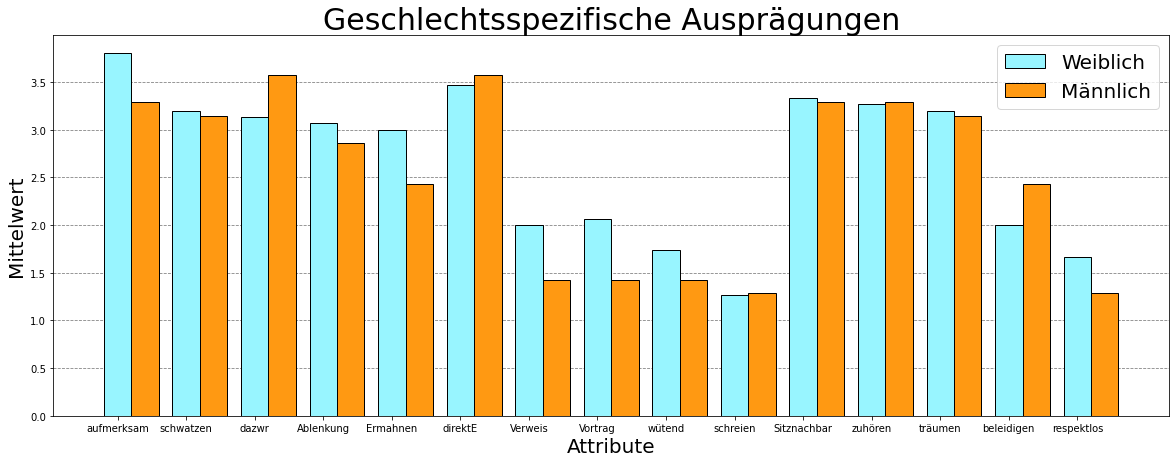

Werte Männer
{'aufmerksam': 3.2857142857142856, 'schwatzen': 3.142857142857143, 'dazwr': 3.5714285714285716, 'Ablenkung': 2.857142857142857, 'Ermahnen': 2.4285714285714284, 'direktE': 3.5714285714285716, 'Verweis': 1.4285714285714286, 'Vortrag': 1.4285714285714286, 'wütend': 1.4285714285714286, 'schreien': 1.2857142857142858, 'Sitznachbar': 3.2857142857142856, 'zuhören': 3.2857142857142856, 'träumen': 3.142857142857143, 'beleidigen': 2.4285714285714284, 'respektlos': 1.2857142857142858}



Werte Frauen
{'aufmerksam': 3.8, 'schwatzen': 3.2, 'dazwr': 3.1333333333333333, 'Ablenkung': 3.066666666666667, 'Ermahnen': 3.0, 'direktE': 3.466666666666667, 'Verweis': 2.0, 'Vortrag': 2.066666666666667, 'wütend': 1.7333333333333334, 'schreien': 1.2666666666666666, 'Sitznachbar': 3.3333333333333335, 'zuhören': 3.2666666666666666, 'träumen': 3.2, 'beleidigen': 2.0, 'respektlos': 1.6666666666666667}





In [8]:
# Geschlechterspezifische Unterschiede für Abschnitt 4
means = df.groupby('Geschlecht').mean()
Spalten = list(df.columns[28:43])
male_1d = [x for y in means.iloc[1:, 28:43].values for x in y]
female_1d = [x for y in means.iloc[:1, 28:43].values for x in y]

# Funktionsaufruf aus modularisiertem Skript
drst.Balkendiagramm('#FF9912', '#98F5FF', Spalten,
                    Spalten, df, (20, 7), 15, female_1d, male_1d, 'Geschlechtsspezifische Ausprägungen',
                    'Attribute', 'Mittelwert', ["Weiblich", "Männlich"], 'sex_differences4.svg')


drst.dictionary(Spalten, male_1d, 'Werte Männer')

drst.dictionary(Spalten, female_1d, 'Werte Frauen')

<div class="alert alert-block alert-info">
<b>Info:</b> Hier wurde sich aus dem Darstellungsmodul bedient und die Funktionen <b>Balkendiagramm</b> und <b>Dictionary</b> benutzt.</div>

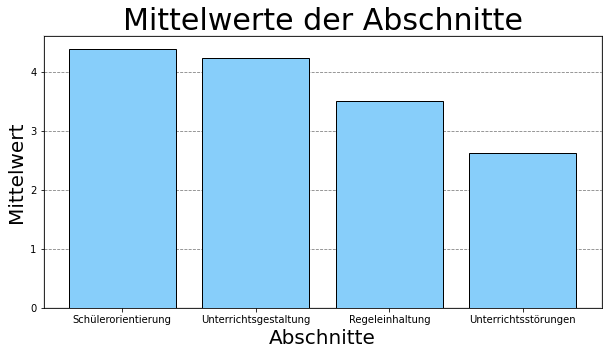

4.384848484848485
4.227272727272727
3.507575757575758
2.6303030303030304


In [9]:
# Mittelwerte aggregiert über die einelnen Abschnitte
mean_part1 = df_ab1.mean(axis=0).mean()
mean_part2 = df_ab2.mean(axis=0).mean()
mean_part3 = df_ab3.mean(axis=0).mean()
mean_part4 = df_ab4.mean(axis=0).mean()
mean_data = [mean_part1, mean_part2, mean_part3, mean_part4]

# Als Plot..
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.bar(
    ["Schülerorientierung",
     "Unterrichtsgestaltung",
     "Regeleinhaltung",
     "Unterrichtsstörungen"],
    mean_data,
    color='#87CEFA',
    edgecolor='k'
)
ax.patch.set_alpha(0.1)
plt.title('Mittelwerte der Abschnitte', fontsize=30)
plt.xlabel("Abschnitte", fontsize=20)
plt.ylabel('Mittelwert', fontsize=20)
ax.yaxis.grid(True, color='gray', linestyle='dashed')
ax.set_axisbelow(True)
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth('2')
plt.show()
fig.savefig('Mittelwerte.svg', bbox_inches='tight', format='svg')

print(mean_part1)
print(mean_part2)
print(mean_part3)
print(mean_part4)